# Импорт библиотек

In [40]:
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

# Загрузка данных

In [41]:
df = pd.read_csv('data/KaggleV2-May-2016.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


# Разведочный анализ данных

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Анализ целевой переменной

*Каково соотношение людей, которые пропускают приемы, к тем, кто этого не делает?*

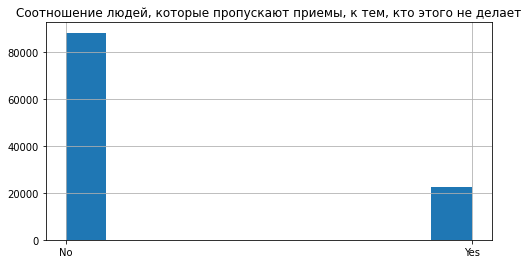

In [43]:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

In [44]:
df['No-show'].value_counts(True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

*Кто не появляется чаще — мужчины или женщины?*

In [45]:
df[df['No-show']=='Yes']['Gender'].value_counts(normalize=True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

# Предобработка данных

**Кодировка категориальных признаков**

In [46]:
categorical_columns_names = ['Gender', 'Neighbourhood']

In [47]:
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)
encoded_columns.head(3)

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Обработка пропусков в данных**

In [48]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Нам повезло — в нашем наборе данных нет нулевых значений.

### Comet

In [1]:
pip install comet_ml


     -------------------------------------- 394.1/394.1 KB 2.2 MB/s eta 0:00:00
     -------------------------------------- 158.7/158.7 KB 4.6 MB/s eta 0:00:00
     -------------------------------------- 470.6/470.6 KB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 54.3/54.3 KB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 54.3/54.3 KB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 140.4/140.4 KB 8.1 MB/s eta 0:00:00
Using legacy 'setup.py install' for configobj, since package 'wheel' is not installed.
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.10
    Uninstalling urllib3-1.26.10:
      Successfully uninstalled urllib3-1.26.10
  Running setup.py install for configobj: started
  Running setup.py install for configobj: finished with status 'done'


You should consider upgrading via the 'c:\Users\Alex\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="J2y4iYpfd4CVeqdlham6COaGl",
    project_name="medical-appointment",
    workspace="aleksejrum",
)

# Report multiple hyperparameters using a dictionary:
hyper_params = {
    "learning_rate": 0.5,
    "steps": 100000,
    "batch_size": 50,
}
experiment.log_parameters(hyper_params)

# Or report single hyperparameters:
hidden_layer_size = 50
experiment.log_parameter("hidden_layer_size", hidden_layer_size)

# Long any time-series metrics:
train_accuracy = 3.14
experiment.log_metric("accuracy", train_accuracy, step=0)

# Run your code and go to /

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/aleksejrum/medical-appointment/607ca13f558b45b9aaed26ffad430b7c

